<h1> Logistic Regression

<ul>
<li>Hồi quy logistic là một trong những thuật toán được sử dụng nhiều nhất trong học máy.</li>
<li>Trước khi có deep learning, hồi quy logistic là lựa chọn mặc định để giải quyết các bài toán phân loại thực tế với hàng trăm nghìn features.</li>
<li>Hồi quy logistic có thể được sử dụng trong các bài toán binary, multi-class và multi-label</li>  
</ul>

In [1]:
from IPython.display import display, Math, Latex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

<h2> Implementation

Trong phần đầu tiên của bài tập này, ta sẽ thực hiện từng bước của thuật toán hồi quy logistic cho bài toán phân loại nhị phân (binary)

<h2> Mô hình

<ul>
<li>Như chúng ta đã biết, thuật toán hồi quy logistic sẽ thực hiện tính toán xác suất của mẫu, đại diện bởi các feature vector x, được phân loại là class 1: $\Pr(y=1|x)$.</li>
<li>Hai bước thực hiện:</li>
<ol>
<li>linear combination of features</li>
<li>sigmoid activation</li>
</ol>
<li>Thực hiện các bước trên để tính toán xác suất của class 1:</li>
<ol>
<li>Bước đầu tiên là thực hiện linear combination of features và ta nhận được vector $z = w^T x$</li>
<li>Bước thứ hai là đưa hàm sigmoid vào z và nhận được hàm xác suất như sau:</li>
</ol>
$$\Pr(y=1|x) = \text{sigmoid}(z) = \frac{1}{1+e^{-z}}$$
</ul>

Việc vector hóa giúp ta có thể tính các xác suất cho từng quan sát cùng một lúc như dưới đây:<br>
1. Vector hóa linear combination of features giúp viêc tính toán hiệu quả hơn:
    $$z_{n \times 1} = X_{n \times m} \cdot w_{m \times 1}$$
    Trong đó:
    <ul>
<li>The feature matrix $X$ $(n,m)$</li>
<li>Vector trọng số $w$ có $m$ thành phần</li>
<li>Vector linear combination $z$ có $n$ thành phần</li>
</ul>

In [ ]:
# Let's implement linear combination in vectorized form
def linear_combination(X:np.ndarray, w:np.ndarray) -> np.ndarray:
    '''Calculates linear combination of features.

The linear combination is calculated with the following vectorized form:
    z = Xw
Args:
    X: feature matrix with shape (n, m)
    w: weight vector with shape (m,)
Returns:
    Linear combination of features with shape (n,)
    '''
    return X@w

2. Vector hóa hàm sigmoid (logistic) activation để thu về vector xác suất:
$$
\Pr(y=1|X)_{n \times 1} = \text{sigmoid}(z_{n \times 1})
$$
    Trong đó:
    <ul>
<li>Hàm sigmoid được đưa vào trong vector $z$ với $n$ thành phần và kết quả trả ra là vector xác suất (activation vector) với $n$ thành phần
</ul>

In [ ]:
# Let's implement sigmoid function in a vectorized form
def sigmoid(z:np.ndarray) -> np.ndarray:
    '''Calculates sigmoid of linear combination of features z.
Args:
    z: List of floats
Returns:
    List of output of sigmoid function
    '''
    return 1/(1+np.exp(-z))

Tiếp sau đó, ta thực hiện đưa hàm vector hóa dự báo (prediction) vào hàm sigmoid, kết quả trả ra là nhãn phân loại. Nếu như giá trị xác suất > giá trị threshold thì ta sẽ đánh nhãn cho quan sát đó là 1 hoặc 0, tùy cách định nghĩa dữ liệu ban đầu

In [ ]:
def predict(X:np.ndarray, w:np.ndarray, threshold:float) -> np.ndarray:
    '''Predicts class label for samples.
The samples are representd with a bunch of features and are presented in form of a feature matrix X. The class label is predicted as follows:
* if sigmoid(Xw) > threshold, the sample is labeled with class 1
    * else class 0.
Args:
    X: feature vector of shape (n,m)
    w: weight vector of shape (m,)
    threshold: probability threshold for classification
Returns:
    A list of class labels of shape (n,)
    '''
    return np.where(sigmoid(linear_combination(X, w)) > threshold, 1, 0)

<h2> Loss function

Tiếp theo ta sẽ thực hiện hàm loss Binary Cross Entropy (BCE) + tham số phạt (regularization). Hàm mất mát (loss) cơ bản không đi kèm tham số phạt có thể được thực hiện sau khi set tham số phạt $\lambda$ = 0 <br>

Phương trình chung của hàm mất mát như dưới đây:
$$ \text{BCE} = \color{blue}{ \text{ BCE on training examples } } + \lambda \color{red}{\text{ regularization penalty}}$$

Lưu ý rằng **regularization rate** $\lambda$ kiểm soát **trọng số của regularization penalty** được sử dụng

Bằng việc đặt $\lambda = 0$, chúng ta nhận được **binary cross entropy loss** như sau:

\begin{eqnarray}
 \text{BCE} &=& \color{blue}{ \text{ BCE on training examples } } + 0 \color{red}{\text{ regularization penalty}} \\
 &=& \color{blue}{ \text{ BCE on training examples } } + 0 \\
 &=& \color{blue}{ \text{ BCE on training examples } }
\end{eqnarray}

Chúng ta sử dụng $\text{L}_2$ và $text{L}_1$ regularization trong Hồi quy Logistic

Với **$\text{L}_2$ regularization**, hàm mất mát có phương trình như sau:
$$
J(\mathbf{w}) = - \left(\sum_{i=1}^{n} y^{(i)}\text{log}\left(\text{sigmoid}(\mathbf{w}^T x^{(i)})\right) + (1 - y^{(i)}) \text{log} \left(1-\text{sigmoid}(\mathbf{w}^T x^{(i)})\right) \right) + \lambda \color{blue}{||\mathbf{w}||^2}
$$

Với **$\text{L}_1$ regularization**, hàm mất mát có phương trình như sau:
$$
J(\mathbf{w}) = - \left(\sum_{i=1}^{n} y^{(i)}\text{log}\left(\text{sigmoid}(\mathbf{w}^T x^{(i)})\right) + (1 - y^{(i)}) \text{log} \left(1-\text{sigmoid}(\mathbf{w}^T x^{(i)})\right) \right) + \lambda \color{blue}{||\mathbf{w}||}
$$

Để viết hàm loss dạng vector, đầu tiên ta phải tính thành phần bên trong tổng dưới dạng vector hóa như sau:
$$
e = y \log(\text{sigmoid}(Xw)) + (1-y) \log(1-\text{sigmoid}(Xw))
$$
Hàm loss trở thành:
$$J(w) = -1^T_{1 \times n} e_{n \times 1}$$
Thêm tham số phạt $\text{L}_2$, ta có:
$$J(w) = -1^T e + \lambda w^Tw $$
Thêm tham số phạt $\text{L}_1$, ta có:
$$J(w) = -1^T e + \lambda 1^T|w|$$
Hàm mất mát sẽ thực hiện tính toán sử dụng **vector nhãn thực tế, vector sigmoid, vector trọng số và tham số phạt $\text{L}_1$ và $\text{L}_2$**
<ul>
<li>Đặt lại giá trị regularization = 0 nếu không cần thiết </li>
<li>Nếu ta đặt các giá trị regularization = 1, ta sẽ thu được elastic net regularization, nói cách khác, với trường hợp elastic net classifier, ta có l1_reg_rate + l2_reg_rate = 1</li>
</ul>
Hàm mất mát trả về một giá trị vô hướng biểu diễn tổng lỗi trên toàn bộ các mẫu huấn luyện cho một lựa chọn cụ thể của vectơ trọng số.

In [ ]:
def loss(y, sigmoid_vector, weight_vector, l1_reg_rate, l2_reg_rate):
    return (-1 * (np.sum(y * np.log(sigmoid_vector) + (1-y) * np.log(1-sigmoid_vector)))
            + l2_reg_rate * np.dot(np.transpose(weight_vector), weight_vector)
            + l1_reg_rate * np.sum(np.abs(weight_vector)))

<h2> Optimization

Tiếp theo chúng ta sẽ tiến hành tối ưu hóa. Để làm được điều này ta sẽ sử dụng các kỹ thuật tối ưu lặp như là Gradient Descent (GD), mini-batch Gradient Descent (MBGD) or stochastic Gradient Descent (SGD) <br>
Ta cần chỉnh sửa cách cập nhật gradient cho phù hợp với hàm mất mất của hồi quy logistic so với hồi quy tuyến tính
<ul>
<li>STEP 1: tính toán hàm mất mất của gradient </li>
<li>STEP 2: điều chỉnh độ dốc gradient bằng learning rate và sử dụng nó để cập nhật vector trọng số </li>
</ul>

<h3> Gradient of loss function

Hàm mất mát Gradient có thể được tính như sau:
$$\frac{\partial }{\partial \mathbf{w}} J(\mathbf{w}) = \mathbf{X}^T (sigmoid(\mathbf{X}\mathbf{w}) - \mathbf{y}) + \lambda \mathbf{w}$$
Trong đó:
<ul>
<li>$sigmoid(Xw)$ là vector sigmoid của các quan sát </li>
<li>y là vector nhãn </li>
<li>w là vector trọng số </li>
<li>$\lambda$ là giá trị regularization </li>
</ul>

Xây dựng hàm **calculate_gradient** sử dụng feature matrix **$X$, vector nhãn y, vector trọng số w và giá trị regularization $\lambda$** để có thể thực hiện tính toán hiệu quả hàm mất mát Gradient

In [ ]:
def calculate_gradient(X:np.ndarray, y:np.ndarray, w:np.ndarray, reg_rate:float) -> np.ndarray:
    '''Calculates gradients of loss function w.r.t weight vector on training set.
The gradient is calculated with the following vectorized operation:
    np.transpose(X)(sigmoid(Xw) - y) + \lambda w
Args:
    X: Feature matrix for training data
    y: Label vector for training data
    reg_rate: regularization rate
Returns:
    A vector of gradients.
    '''
    return np.transpose(X)@(sigmoid(linear_combination(X, w)) - y) + reg_rate * w

<h2> Logistic regression class implementation

Kết hợp các hàm ở trên, tạo một class 'LogisticRegression' <br>
Trong class này chứa các biến thành phần như sau: <br>
<ul>
<li>Vector trọng số </li>
<li>Các vector mất mát (loss) và trọng số ở mỗi bước giảm Gradient </li>
</ul>

In [5]:
class LogisticRegression(object):
    """Logistic regression model.
    y = sigmoid(X@w)
    """
    def set_weight_vector(self, w):
        self.w = w

    def linear_combination(self, X:np.ndarray) -> np.ndarray:
        '''Calculate linear combination of features.
        The linear combination is calculated with the following vectorized form:
            z = Xw
        Args:
            X: feature matrix with shape (n, m)
        Returns:
            Linear combination of features with shape (n,)
        '''
        return X@self.w

    def sigmoid(self, z: np.ndarray):
        """Return probability of input belonging class 1.
        Args:
            z : (n, ) np.ndarray
        Returns:
            sigmoid activation vector (n,) np.andarray
        """
        return 1/(1 + np.exp(-z))

    def activation(self, X:np.ndarray) -> np.ndarray:
        '''Calculates sigmoid activation for logistic regression.
        The sigmoid activation is calculated with the following vectorized form:
            act = sigmoid(Xw)
        Args:
            X: feature matrix with shape (n, m)
        Returns:
            activation vector with shape (n,)
        '''
        return self.sigmoid(self.linear_combination(X))

    def predict(self, x: np.ndarray, threshold: float = 0.5):
        """Classify input data.
        Args:
            x : (N, D) np.ndarray
            threshold: float, optional
                threshold of binary classification (default is 0.5)
        Returns:
            (N,) np.andarray
        """
        return (self.activation(x) > threshold).astype(int)

    def loss(self, X:np.ndarray, y:np.ndarray, reg_rate:float) -> float:
        '''Calculates binary cross entropy loss on training set.
        Args:
            X: feature matrix for training data
            y: label vector for training data.
            reg_rate: regularization rate
        Returns:
            loss.
        '''
        predicted_prob = self.activation(X)
        return (-1*(np.sum(y*np.log(predicted_prob) + (1-y) *
                           np.log(1-predicted_prob))) +
                           reg_rate * np.dot(np.transpose(self.w), self.w))

    def calculate_gradient(self, X:np.ndarray, y:np.ndarray, reg_rate: float) -> np.ndarray:
        '''Calculates gradient of loss function w.r.t weight vector on training set
        Args:
            X: feature matrix for training data
            y: label vector for training data.
            reg_rate: regularization rate
        Returns:
            A vector of gradients.
        '''
        return np.transpose(X)@(self.activation(X)-y) + reg_rate * self.w

    def update_weights(self, grad:np.ndarray, lr:float) -> np.ndarray:
        '''Updates the weights based on the gradient of loss function
        Weight updates are carried out with the following formula:
            w_new := w_old - lr*grad
        Args:
            grad: gradient of loss w.r.t w
            lr: learning rate
        Returns:
            Updated weight vector.
        '''
        return (self.w - lr*grad)

    def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float, reg_rate: float) -> np.ndarray:
        '''Estimates parameters of linear regression model through gradient descent.
        Args:
            X: feature matrix for training data
            y: label vector for training data.
            num_epochs: Number of training steps
            lr: learning rate
            reg_rate: regularization rate
        Returns:
            Weight vector: final weight vector
        '''
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []
        for i in np.arange(0, num_epochs):
            dJdW = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(dJdW, lr)
        return self.w

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Môn tối ưu hóa/data_toiuu.csv'
df = pd.read_csv(file_path, encoding='utf-8', usecols=lambda x: x not in ["level_0", "index", 'Unnamed: 0'])
df.head()

,LaivayDukien,TongChiphi,TongThu-TongChi,LuongPhucap,TongThunhap,SPPhiTindung,SoduTienguiKyhan,SoduTienguiTT,PhanKhuc,SoluongSPvay,SLTCTD,TinhhinhQHTD,LichsuQHTD12T,ThoigianQHTD_nam,SoNguoiPhuthuoc,GioiTinh,Tuoi,TrinhdoHocvan,TinhtrangHonnhan,LoaihinhLienlac,SohuuNha,LoaihinhThunhap,LoaihinhCutru,LoaihinhBaohiem,Nghenghiep,LoaihinhCoquan,VitriCongtac,ThoigianCongtac_thang,LoaihinhHopdong,NguonTrano,SotienVay,ThoigianVay,Rating,Classified
0,0.0,0.0,0.00,0.00,0.00,NaN,0.0,0.0,NaN,0,0,NaN,NaN,0,0.0,Nữ,45,NaN,Đã kết hôn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Từ TSBĐ,2.800000e+08,46.0,-619983.18,NaN
1,980000.0,12980000.0,17520000.00,10500000.00,30500000.00,Đang có tiền gửi thanh toán/sử dụng dịch vụ kh...,0.0,31678621.0,Khách hàng phổ thông,0,0,Không có dư nợ,Có quan hệ tín dụng và chưa từng phát sinh nợ...,3,2.0,Nam,23,Đại học,Đã kết hôn,Chỉ có số điện thoại di động,Sở hữu một phần,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Tham gia từ 2 loại bảo hiểm trở lên,Hành chính văn phòng,Cơ quan hành chính sự nghiệp,Lãnh đạo cấp phòng,192.0,Biên chế,"Kết hợp (từ lương, SXKD và nguồn khác)",1.000000e+08,12.0,79.20,AA-
2,2470000.0,2470000.0,4749121.67,7219121.67,7219121.67,Đang có tiền gửi thanh toán/sử dụng dịch vụ kh...,0.0,85675.0,Khách hàng cao cấp - Private,0,0,Không có dư nợ,Có quan hệ tín dụng và chưa từng phát sinh nợ...,3,0.0,Nữ,25,Đại học,Độc thân,Chỉ có số điện thoại cố định tại nhà hoặc cơ ...,Sở hữu toàn bộ 100%,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Tham gia từ 2 loại bảo hiểm trở lên,Giáo dục,Cơ quan hành chính sự nghiệp,Chuyên viên,60.0,Biên chế,Thu nhập từ lương,1.000000e+08,60.0,78.00,A+
3,0.0,5000000.0,668138.00,5668138.00,5668138.00,Đã từng có tiền gửi thanh toán/sử dụng dịch vụ...,0.0,31267083.0,Khách hàng phổ thông,0,0,Không có thông tin,Không có thông tin,0,1.0,Nam,43,Đại học,Đã kết hôn,Chỉ có số điện thoại di động,Sở hữu toàn bộ 100%,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Không có thông tin,Hành chính văn phòng,Cơ quan hành chính sự nghiệp,Lãnh đạo cấp phòng,240.0,HĐLĐ không xác định thời hạn,Thu nhập từ lương,3.000000e+07,12.0,76.60,A+
4,0.0,0.0,0.00,0.00,0.00,NaN,0.0,0.0,NaN,0,0,NaN,NaN,0,0.0,Nữ,43,NaN,Đã kết hôn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Từ TSBĐ,4.400000e+09,49.0,-619982.78,NaN


In [ ]:
df.duplicated().sum()

14373

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.replace("unknown", pd.NA, inplace=True)
df = df.dropna()
df = df[df['TongThunhap'] > 500000]
df = df[df['TongChiphi'] > 0]
df = df[df['ThoigianVay'] > 0]
df = df[df['Tuoi'] >= 18]

In [ ]:
df['class'] = df['Rating'].apply(lambda x: 1 if x > 80 else 0)
df.head()

,LaivayDukien,TongChiphi,TongThu-TongChi,LuongPhucap,TongThunhap,SPPhiTindung,SoduTienguiKyhan,SoduTienguiTT,PhanKhuc,SoluongSPvay,SLTCTD,TinhhinhQHTD,LichsuQHTD12T,ThoigianQHTD_nam,SoNguoiPhuthuoc,GioiTinh,Tuoi,TrinhdoHocvan,TinhtrangHonnhan,LoaihinhLienlac,SohuuNha,LoaihinhThunhap,LoaihinhCutru,LoaihinhBaohiem,Nghenghiep,LoaihinhCoquan,VitriCongtac,ThoigianCongtac_thang,LoaihinhHopdong,NguonTrano,SotienVay,ThoigianVay,Rating,Classified,class
1,980000.0,12980000.0,17520000.00,10500000.00,30500000.00,Đang có tiền gửi thanh toán/sử dụng dịch vụ kh...,0.0,31678621.0,Khách hàng phổ thông,0,0,Không có dư nợ,Có quan hệ tín dụng và chưa từng phát sinh nợ...,3,2.0,Nam,23,Đại học,Đã kết hôn,Chỉ có số điện thoại di động,Sở hữu một phần,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Tham gia từ 2 loại bảo hiểm trở lên,Hành chính văn phòng,Cơ quan hành chính sự nghiệp,Lãnh đạo cấp phòng,192.0,Biên chế,"Kết hợp (từ lương, SXKD và nguồn khác)",100000000.0,12.0,79.2,AA-,0
2,2470000.0,2470000.0,4749121.67,7219121.67,7219121.67,Đang có tiền gửi thanh toán/sử dụng dịch vụ kh...,0.0,85675.0,Khách hàng cao cấp - Private,0,0,Không có dư nợ,Có quan hệ tín dụng và chưa từng phát sinh nợ...,3,0.0,Nữ,25,Đại học,Độc thân,Chỉ có số điện thoại cố định tại nhà hoặc cơ ...,Sở hữu toàn bộ 100%,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Tham gia từ 2 loại bảo hiểm trở lên,Giáo dục,Cơ quan hành chính sự nghiệp,Chuyên viên,60.0,Biên chế,Thu nhập từ lương,100000000.0,60.0,78.0,A+,0
3,0.0,5000000.0,668138.00,5668138.00,5668138.00,Đã từng có tiền gửi thanh toán/sử dụng dịch vụ...,0.0,31267083.0,Khách hàng phổ thông,0,0,Không có thông tin,Không có thông tin,0,1.0,Nam,43,Đại học,Đã kết hôn,Chỉ có số điện thoại di động,Sở hữu toàn bộ 100%,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Không có thông tin,Hành chính văn phòng,Cơ quan hành chính sự nghiệp,Lãnh đạo cấp phòng,240.0,HĐLĐ không xác định thời hạn,Thu nhập từ lương,30000000.0,12.0,76.6,A+,0
10,0.0,4000000.0,18266754.00,14266754.00,22266754.00,Đang có tiền gửi có kỳ hạn tại BIDV,0.0,14774112.0,Khách hàng phổ thông,0,0,Không có dư nợ,Không có quan hệ tín dụng với các TCTD,0,0.0,Nam,39,Trên đại học,Đã kết hôn,Chỉ có số điện thoại di động,Sở hữu toàn bộ 100%,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Tham gia từ 2 loại bảo hiểm trở lên,Hành chính văn phòng,Cơ quan hành chính sự nghiệp,Lãnh đạo cấp cao,120.0,HĐLĐ không xác định thời hạn,Thu nhập từ lương,100000000.0,12.0,85.0,AA+,1
12,9035000.0,13035000.0,21579691.67,13614691.67,34614691.67,Đang có tiền gửi thanh toán/sử dụng dịch vụ kh...,0.0,99847.0,Khách hàng phổ thông,0,0,Không có dư nợ,Có quan hệ tín dụng và chưa từng phát sinh nợ...,3,0.0,Nam,42,Đại học,Đã kết hôn,Chỉ có số điện thoại di động,Sở hữu toàn bộ 100%,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Tham gia từ 2 loại bảo hiểm trở lên,Hành chính văn phòng,Cơ quan hành chính sự nghiệp,Chuyên viên,304.0,Biên chế,Thu nhập từ lương và nguồn khác,350000000.0,60.0,76.2,A+,0


In [ ]:
df['class'].value_counts()

,count
class,
1,43259
0,32687


In [ ]:
df.shape

(75946, 35)

In [ ]:
df.to_csv('/content/drive/MyDrive/Môn tối ưu hóa/final_data.csv', index=False)

Final weights: [ 1.09653354 -1.85070661  2.34753845  2.40873746]
Training accuracy: 100.00%
Test accuracy: 100.00%
Final training loss value: 1.9339


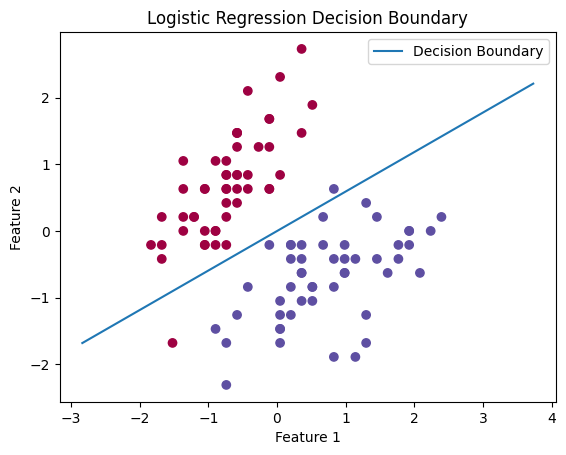

In [10]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Using only two classes (binary classification)
iris = load_iris()
X = iris.data[iris.target != 2]  # Use only classes 0 and 1
y = iris.target[iris.target != 2]  # Use only classes 0 and 1

# Standardize the feature set
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
num_epochs = 1000
lr = 0.01
reg_rate = 0.1

# Train the model using gradient descent
final_weights = model.gd(X, y, num_epochs, lr, reg_rate)

# Predicting the labels for the training data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate training and test accuracy
train_accuracy = np.mean(train_predictions == y_train)
test_accuracy = np.mean(test_predictions == y_test)
print(f"Final weights: {final_weights}")
print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
print(f"Final training loss value: {model.err_all[-1]:.4f}")

# Plot decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
x_values = [np.min(X[:, 0] - 1), np.max(X[:, 1] + 1)]
y_values = -(final_weights[0] * np.array(x_values)) / final_weights[1]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.show()


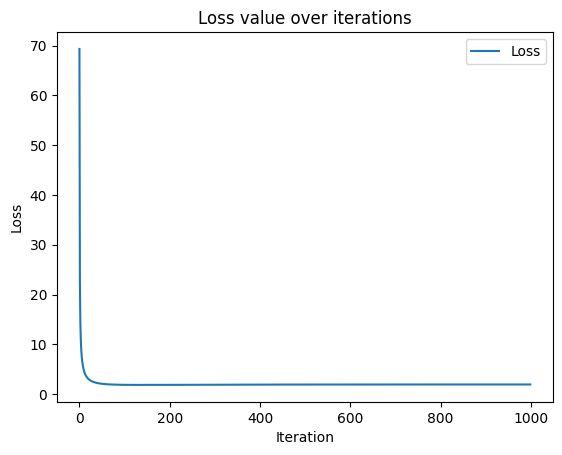

In [11]:
# Plot loss over iterations
plt.plot(np.arange(num_epochs), model.err_all, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss value over iterations')
plt.legend()
plt.show()